# $\mathcal{K}$-Nearest Neighbours

This notebook will be used to run a KNN algorithm which attempts to predict whether the price of a user given equity will rise or fall the following day. For the purposes of demonstration, the data retrieved for all equities will be 5 years on a 1 day interval.

Stock exampple used here is MSFT. 

***
## Regression
The **estimator** for the mean of the $K$ neighbours (predicted value) is given as:
$$\hat{f}(x) = \text{Average}\left[ y_i | x_i \in \mathcal{N}_k(x) \right]$$
where $\mathcal{N}_k(x)$ is a neighbourhood of $x$ containing the $k$ closest observations.

***
## Classification
The predicted label is the class most represented among the neighbours (class with plurality). We compute the conditional probability after taking the majority vote among $k$ nearest neighbours for each class $j=1,\dots,K$ and assign the observation to the class with the highest conditional probability:
$$P(G=j|X=x_0)=\frac{1}{k}\sum_{i\in \mathcal{N}_k(x)}I(y_i=j)$$
where $I$ is the indicator function.

***
## Distance Metrics
In order to find the nearest neighbours, we utilise the Euclidian distance:
$$
d = \left( \sum_{n=i}^n|x_i - y_i|^p \right)^{\frac{1}{p}}
$$
where when $p=1$ we have the Minkowski distance (generalised distance metric), and when $p=2$ we have the Manhatten distance.

***
## Cross-Validation

To select the number of neighbours $k$, we utilise the training set. By setting $k$ close to 1 we gain the most flexibility (low bias) but highest variability (high variance), likewise we obtain the opposite setting $k$ close to 0. In order to select $k$ appropriately, we begin with 0.2 as a default input and then use cross validation.

As we are unable to use a classical cross-validation technique such as KFold (the assumption of iid samples results in poor estimators on time series data), instead we utilise the **forward chaining** method. This involves training and testing with the same windows size and subsequently increasing the training window to encompass the previous test and training windows. The following test window remains the same size but uses the previous training and testing windows as a training input.

In [2]:
import pyfolio as pf
from datetime import datetime, timedelta
import panel as pn
from KNN.knn_functions import KNNPricePredictor
from KNN.knn_panel import KNNPanel
import warnings
warnings.filterwarnings('ignore')

/Users/joshuaashmore/Library/Python/3.9/lib/python/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
stock = input("Input stock ticker: ")

In [4]:
KNN =  KNNPricePredictor(stock=stock)
acc_train, acc_test, init_y_pred = KNN.predict_model()
print(f'Train Accuracy: {acc_train:0.4}, Test Accuracy: {acc_test:0.4}')

acc_train, acc_test, clf, cv_y_pred = KNN.fit_and_predict()
print(f'New Train Accuracy: {acc_train:0.4}, New Test Accuracy: {acc_test:0.4}')

[*********************100%***********************]  1 of 1 completed
Train Accuracy: 0.6859, Test Accuracy: 0.4802
New Train Accuracy: 0.5736, New Test Accuracy: 0.5516


              precision    recall  f1-score   support

          -1       0.54      0.44      0.48       139
           1       0.43      0.53      0.48       113

    accuracy                           0.48       252
   macro avg       0.48      0.48      0.48       252
weighted avg       0.49      0.48      0.48       252



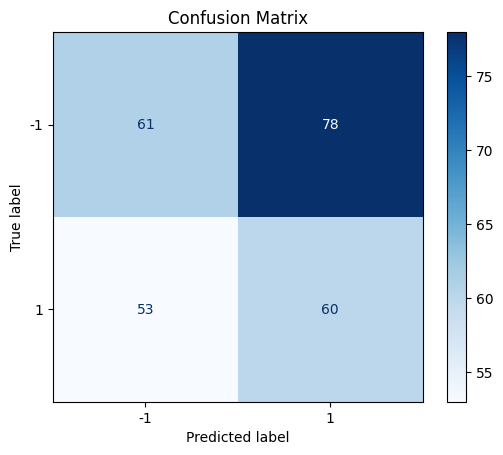

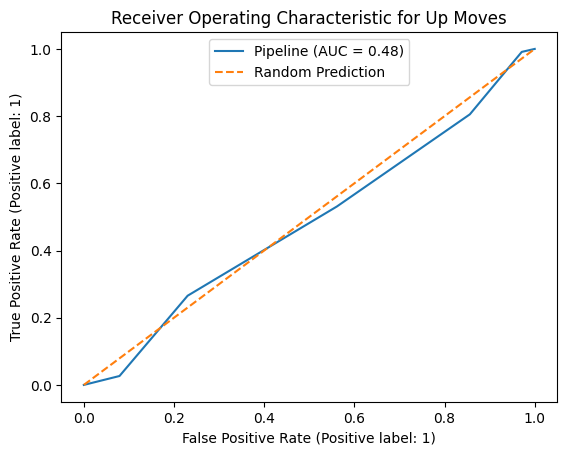

In [5]:
KNN.plot_confusion_matrix(y_pred = init_y_pred)
KNN.plot_random_prediction()

              precision    recall  f1-score   support

          -1       0.64      0.44      0.52       139
           1       0.50      0.69      0.58       113

    accuracy                           0.55       252
   macro avg       0.57      0.56      0.55       252
weighted avg       0.57      0.55      0.55       252



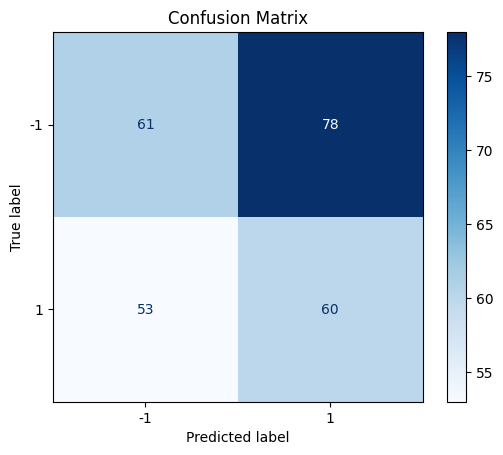

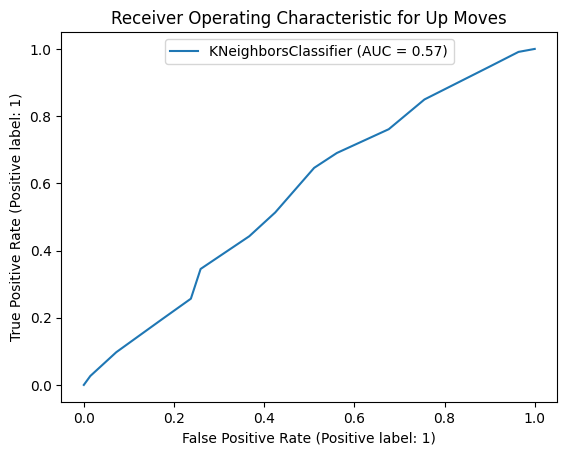

In [6]:
KNN.plot_confusion_matrix(y_pred = cv_y_pred)
KNN.plot_clf_random_prediction()

Start date,2017-10-16
End date,2022-10-13
Total months,59
,Backtest
Annual return,82.819%
Cumulative returns,1932.486%
Annual volatility,30.006%
Sharpe ratio,2.16
Calmar ratio,3.75
Stability,0.98
Max drawdown,-22.082%


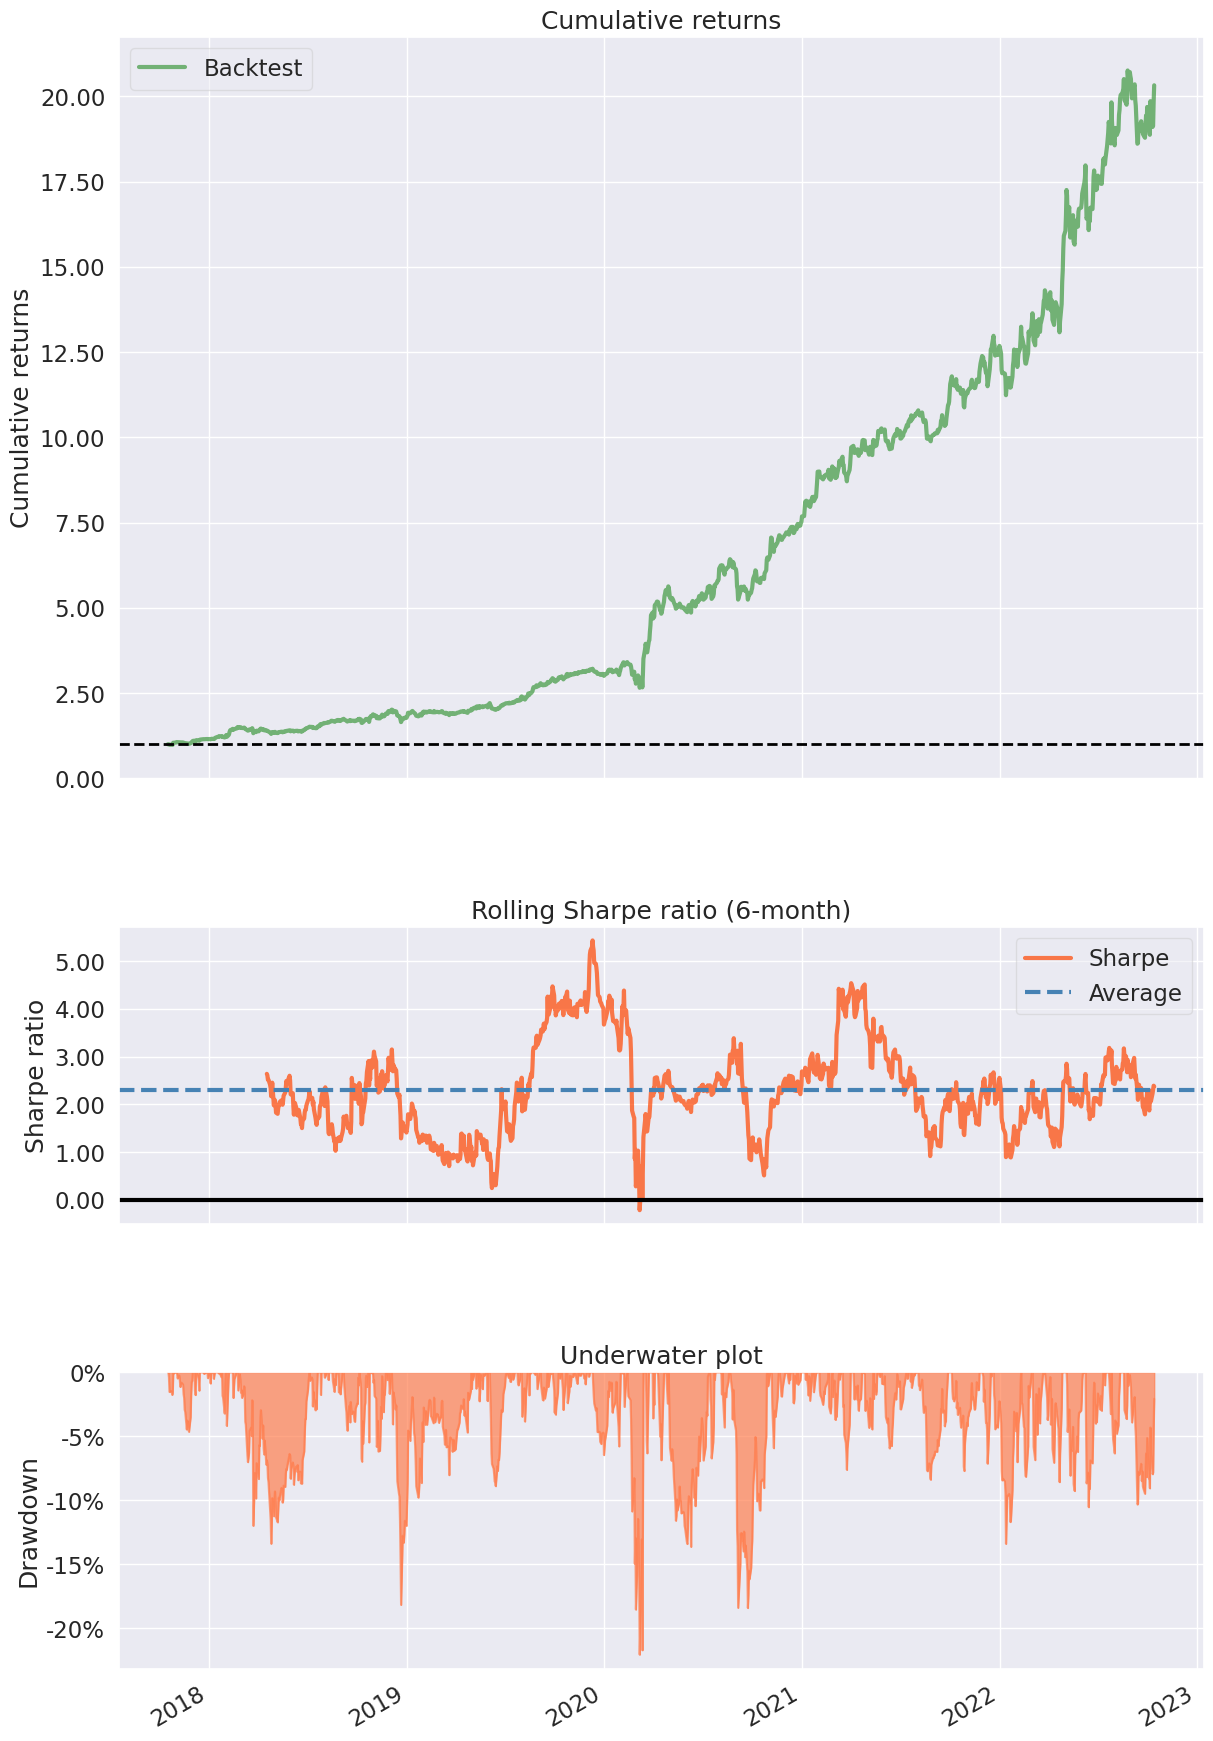

In [7]:
df = KNN.trading_strategy()
pf.create_simple_tear_sheet(df['Strategy'])
# pf.create_returns_tear_sheet(df['Strategy'], live_start_date=(datetime.now() - timedelta(days=3*365)).strftime('%Y-%m-%d'))